In [77]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from datetime import datetime

In [78]:
Co60=pd.read_table("./data/NaI_60Co_600s.dat",sep="\s+")
Cs137=pd.read_table("./data/NaI_137Cs_600s.dat",sep="\s+")
Na22=pd.read_table("./data/NaI_22Na_600s.dat",sep="\s+")
Fondo_600s=pd.read_table("./data/NaI_Fondo_600s.dat",sep="\s+")
Co57=pd.read_table("./data/NaI_57Co_300s.dat",sep="\s+")
Fondo_300s=pd.read_table("./data/NaI_Fondo_300s.dat",sep="\s+")
Fondo6y=Fondo_600s.cuentas
Fondo3y=Fondo_300s.cuentas
Canales=Fondo_600s.canal
Co60y=Co60.cuentas-Fondo6y
Cs137y=Cs137.cuentas-Fondo6y
Na22y=Na22.cuentas-Fondo6y
Co57y=Co57.cuentas-Fondo3y



In [79]:
def gaussiana(x,M1,mu1,sigma1):
    return M1*np.exp(-0.5*((mu1-x)/(sigma1))**2)
def fondo(x,b0,b1,mu):
    return b0+b1*(mu-x)

def gaussiana_experimental(x,M,mu,sigma,b0,b1):
    return fondo(x,b0,b1,mu)+gaussiana(x,M,mu,sigma)

def gaussiana_doble(x,M1,M2,mu1,mu2,sigma1,sigma2,b0,b1):
    return fondo(x,b0,b1,mu1)+gaussiana(x,M1,mu1,sigma1)+gaussiana(x,M2,mu2,sigma2)

In [80]:
def ajustar_gaussiana(Canales,n,x1,x2,y,M1,mu1,sigma1,b0,b1,M2=1,mu2=1,sigma2=1):
    if n==1:
        fit=curve_fit(gaussiana_experimental,Canales[x1:x2],y[x1:x2],p0=[M1,mu1,sigma1,b0,b1])
        args=fit[0]
        errorargs=np.sqrt(np.diag(fit[1]))
        print(f"M1={args[0]:.2f}, mu1={args[1]:.2f}, sigma1={args[2]:.2f}, bo={args[3]:.2f},b1={args[4]:.2f}")
        print(f"Errores={errorargs}")
        return args,errorargs
    elif n==2:
        fit=curve_fit(gaussiana_doble,Canales[x1:x2],y[x1:x2],p0=[M1,M2,mu1,mu2,sigma1,sigma2,b0,b1])
        args=fit[0]
        errorargs=np.sqrt(np.diag(fit[1]))
        print(f"M1={args[0]:.2f}, M2={args[1]:.2f}, mu1={args[2]:.2f}, mu2={args[3]:.2f}, sigma1={args[4]:.2f}, sigma2={args[5]:.2f}, bo={args[6]:.2f},b1={args[7]:.2f}")
        print(f"Errores={errorargs}")
        return args,errorargs




Co60

M1=1278.27, M2=1110.31, mu1=384.68, mu2=432.98, sigma1=8.84, sigma2=9.45, bo=170.85,b1=1.87
Errores=[9.53283792 9.56465657 0.07313266 0.08752222 0.08071963 0.10514622
 3.92974388 0.06778923]


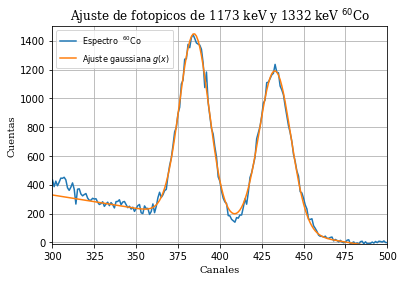

In [81]:
a,b=ajustar_gaussiana(Canales,2,325,475,Co60y,1200,380,20,200,-0.6,1000,430,20)
fig,ax=plt.subplots()

ax.plot(Canales,Co60y,label=r"Espectro  $^{60}$Co")
ax.plot(gaussiana_doble(Canales,*a),label=r"Ajuste gaussiana $g(x)$")



ax.set_xlim(300,500)
ax.set_ylim(-10,1500)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste de fotopicos de 1173 keV y 1332 keV $^{60}$Co",family="serif")
ax.grid()
ax.legend(fontsize=8)


plt.show()


In [82]:
#Area fotopico 1173 Co60
M1=ufloat(a[0],b[0])
mu1=ufloat(a[2],b[2])
sigma1=ufloat(a[4],b[4])
area1173=M1*sigma1*np.sqrt(2*np.pi)
print(area1173)

#Area fotopico 1332 Co60
M2=ufloat(a[1],b[1])
mu2=ufloat(a[3],b[3])
sigma2=ufloat(a[5],b[5])
area1331=M2*sigma2*np.sqrt(2*np.pi)
print(area1331)

(2.831+/-0.033)e+04
(2.63+/-0.04)e+04


Cs137

M1=10010.93, mu1=21.08, sigma1=1.17, bo=983.87,b1=-18.11
Errores=[1.81244642e+02 2.38992339e-02 2.61933815e-02 7.16980545e+01
 1.26727252e+01]


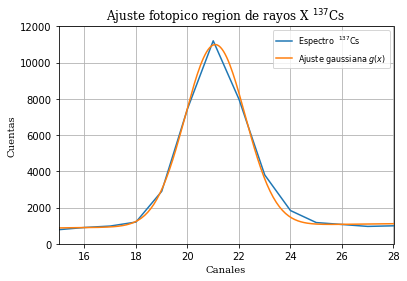

In [83]:
a,b=ajustar_gaussiana(Canales,1,15,30,Cs137y,10000,22,2,1000,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Cs137y,label=r"Espectro  $^{137}$Cs")
ax.plot(np.linspace(0,30,500),gaussiana_experimental(np.linspace(0,30,500),*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(15,28)
ax.set_ylim(0,12000)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico region de rayos X $^{137}$Cs",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()

In [84]:
#Area fotopico rayos X Cs137
M1=ufloat(a[0],b[0])
mu1=ufloat(a[1],b[1])
sigma1=ufloat(a[2],b[2])
areaX=M1*sigma1*np.sqrt(2*np.pi)
areaX

29249.826947968868+/-844.0736649390379

M1=10685.23, mu1=228.08, sigma1=6.85, bo=86.10,b1=2.57
Errores=[2.36833371e+01 1.72369256e-02 1.85576084e-02 8.20928460e+00
 2.29642098e-01]


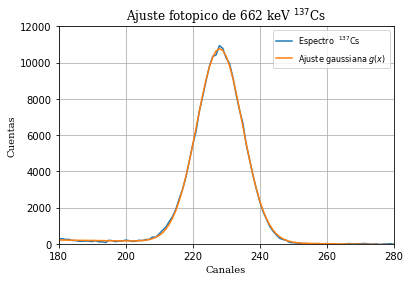

In [85]:
a,b=ajustar_gaussiana(Canales,1,180,280,Cs137y,10000,230,40/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Cs137y,label=r"Espectro  $^{137}$Cs")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(180,280)
ax.set_ylim(0,12000)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 662 keV $^{137}$Cs",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()

In [86]:
#Area fotopico 662 Cs137
M1=ufloat(a[0],b[0])
mu1=ufloat(a[1],b[1])
sigma1=ufloat(a[2],b[2])
area662=M1*sigma1*np.sqrt(2*np.pi)
area662

183496.5971501268+/-642.2370911571755

Na22

M1=1408.86, mu1=179.49, sigma1=5.75, bo=26.40,b1=0.35
Errores=[10.24114567  0.04743029  0.05126083  3.6723535   0.12702849]


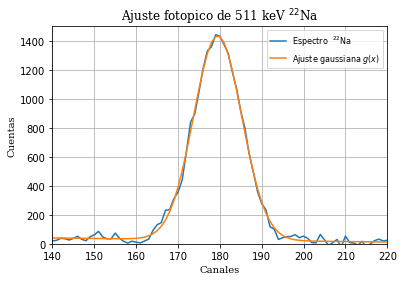

In [87]:
a,b=ajustar_gaussiana(Canales,1,140,220,Na22y,1400,176,30/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Na22y,label=r"Espectro  $^{22}$Na")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(140,220)
ax.set_ylim(0,1500)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 511 keV $^{22}$Na",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()


In [88]:
#Area fotopico 511 Na22
M1=ufloat(a[0],b[0])
mu1=ufloat(a[1],b[1])
sigma1=ufloat(a[2],b[2])
area511=M1*sigma1*np.sqrt(2*np.pi)
area511

20301.387326419685+/-233.55622365022234

M1=208.13, mu1=414.40, sigma1=9.61, bo=0.67,b1=-0.01
Errores=[3.60430824 0.18883611 0.20461006 1.32044019 0.0278976 ]


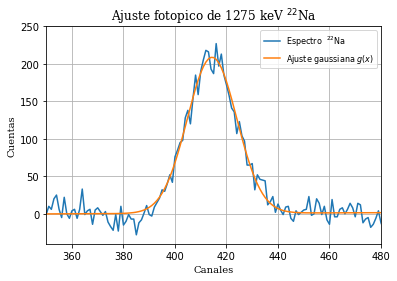

In [89]:
a,b=ajustar_gaussiana(Canales,1,350,480,Na22y,220,410,45/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Na22y,label=r"Espectro  $^{22}$Na")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(350,480)
ax.set_ylim(-40,250)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 1275 keV $^{22}$Na",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()


In [90]:
#Area fotopico 1275 Na22
M1=ufloat(a[0],b[0])
mu1=ufloat(a[1],b[1])
sigma1=ufloat(a[2],b[2])
area1275=M1*sigma1*np.sqrt(2*np.pi)
area1275

5012.287021962875+/-137.58253005370037

Co57

M1=876.78, M2=4730.66, mu1=45.91, mu2=58.74, sigma1=4.31, sigma2=2.89, bo=90.18,b1=0.19
Errores=[3.46994580e+01 4.06432069e+01 2.03612675e-01 3.15823480e-02
 2.34620785e-01 3.33077448e-02 1.34826480e+01 5.80968614e-01]


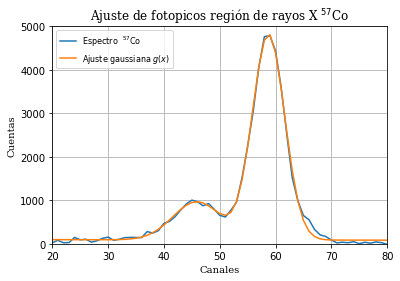

In [91]:
a,b=ajustar_gaussiana(Canales,2,20,80,Co57y,1000,45,10/3,10,0.08,4800,59,20/3)
fig,ax=plt.subplots()

ax.plot(Canales,Co57y,label=r"Espectro  $^{57}$Co")
ax.plot(gaussiana_doble(Canales,*a),label=r"Ajuste gaussiana $g(x)$")



ax.set_xlim(20,80)
ax.set_ylim(0,5000)


ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste de fotopicos región de rayos X $^{57}$Co",family="serif")
ax.grid()
ax.legend(fontsize=8)


plt.show()


In [92]:
#Ajuste de tres gaussianas parametros
M1= ufloat(2264.548716655071, 26.583556107424393)
mu1= ufloat(112.79948394700642, 0.4564801083099677)
sigma1= ufloat(41.213086735748846, 0.5109056394551322)

areaPicoEscape=M1*sigma1*np.sqrt(2*np.pi)

M2= ufloat(4162.745818826935, 35.50298177097549)
mu2= ufloat(145.20183962874864, 0.07200320233079184)
sigma2= ufloat(7.89796460415087, 0.08472789690404017)

area122=M2*sigma2*np.sqrt(2*np.pi)

M3= ufloat(692.9328030821354, 13.079268612435353)
mu3= ufloat(228.19005912926923, 4.010050371919793)
sigma3= ufloat(125.94560110973009, 2.403292143763418)

area136=M3*sigma3*np.sqrt(2*np.pi)

print(areaPicoEscape)
print(area122)
print(area136)

(2.34+/-0.04)e+05
(8.24+/-0.11)e+04
(2.19+/-0.06)e+05


In [93]:
from uncertainties import ufloat
M=ufloat(1110,9)
sigma=ufloat(9.45,0.08)
Fwhm=2*np.sqrt(2*np.log(2))*sigma
area=M*sigma*np.sqrt(2*np.pi)
print(area)
print(Fwhm)

(2.629+/-0.031)e+04
22.25+/-0.19


In [94]:
def E(canal):
    return 3.16*canal

In [95]:
f=ufloat(22.2,0.2)
E(f)

70.152+/-0.6320000000000001

In [96]:
#actividad el dia del experimento
def time_dif(fecha_experimento,fecha_calibracion):
    t0 = datetime.strptime(fecha_calibracion, '%d-%m-%Y')
    t = datetime.strptime(fecha_experimento, '%d-%m-%Y')
    time_difference=t-t0
    days_difference = time_difference.days
    years_difference = days_difference/365
    return years_difference

def Act(A0,fecha_experimento,fecha_calibracion,semivida):
    tau=semivida/np.log(2)
    A=A0*np.exp(-time_dif(fecha_experimento,fecha_calibracion)/tau)
    return A

A_na22 = Act(31.9,'5-03-2018','6-07-2006', 2.6019)
A_co60 = Act(34.8,'5-03-2018','8-06-2006',5.2714)
A_cs137 = Act(35.1,'5-03-2018','18-05-2006', 30.07)
print(A_na22, A_co60, A_cs137)


E122=area122/34.8
E136=area136/4.34
E662=area662/22.7
E1173=area1173/7.41
E1275=area1275/1.42
E1331=area1331/7.42
Eficiencias= np.array([E122,E136,E662, E1173,E1275,E1331])
print(Eficiencias)


1.4238792222428405 7.425024725704147 26.737621166829292
[2368.1312376565706+/-32.4551003052088
 50405.08242963754+/-1352.8827615876344
 8083.550535247877+/-28.292382870360157
 3820.3303275321423+/-45.05537518612492
 3529.779592931602+/-96.88910567161999
 3543.6841838540554+/-49.87285022239608]


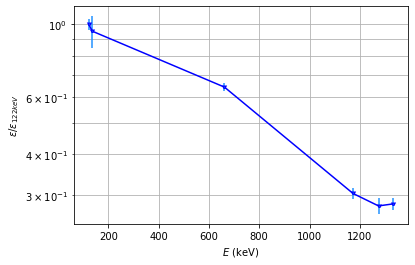

In [113]:
E = np.array([122.1,136.5,661.7,1173.2,1274.5,1332.5])
eff = np.array([6286,5990, 4041, 1910, 1750, 1775 ])
Deff = np.array([240,667,122,76,96,71])
plt.ylabel(r'$\varepsilon/\varepsilon_{122keV}$')
plt.xlabel(r'$E$ (keV)')
plt.grid(which='both',alpha=1)
plt.gcf().set_facecolor('white')

#plt.xlim(20,300)
#plt.ylim(400,3000)
plt.yscale('log')

plt.errorbar(E,eff/np.max(eff),yerr=Deff/np.max(eff),\
             marker='v', mfc='dodgerblue', mec='blue', ms=2, mew=2,ecolor='dodgerblue',\
             ls='', label=r"Espectros por separado")
plt.plot(E,eff/np.max(eff),color='blue',label=r'' )
#plt.legend(title=r"", loc=0, fontsize="26" )
plt.savefig('eficienciaEnergia.png', dpi=300)
plt.show()